In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import seaborn as sns

In [35]:
train = pd.read_csv('/Users/Nbui2/Documents/titanic_project/train.csv')
test = pd.read_csv('/Users/Nbui2/Documents/titanic_project/test.csv')


In [36]:
data = [train, test]

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are null values in Age, Cabin, and Embarked (very little)

We will need to convert some variables to numbers later on: Sex, Pclass, Ticket, Cabin, Embarked

The features also seem to have different ranges, we will need to convert them into the same scale

## Deal with missing data & Preprocessing

### Embarked

In [40]:
#We will fill Embarked with the most popular entry
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train[['Embarked']] = train[['Embarked']].fillna(value = 'S')
test[['Embarked']] = test[['Embarked']].fillna(value='S')

In [42]:
embark_map = {'S':0, 'C':1, 'Q':2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark_map)

In [43]:
train.groupby(['Embarked'], as_index=False).Survived.mean()

,Embarked,Survived
0,0,0.339009
1,1,0.553571
2,2,0.389610


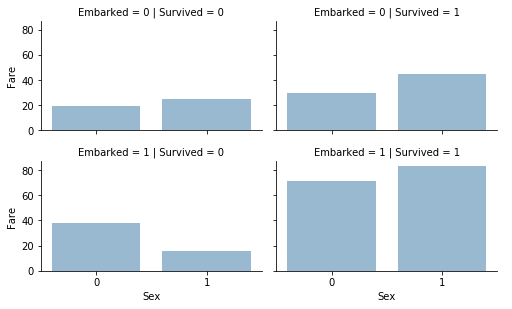

In [101]:
grid = sns.FacetGrid(train, row = 'Embarked', col = 'Survived', height=2.2, aspect=1.6, col_order = [0,1], row_order = [0,1])
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

### Age

In [44]:
age_copy = train[['Age']].copy(deep=True)

In [45]:
mean_imputer = SimpleImputer(strategy = 'mean')
mean_imputer.fit(age_copy)
age_copy.iloc[:, :] = mean_imputer.transform(age_copy)

In [46]:
train['Age'] = age_copy

In [47]:
train[train['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [48]:
test['Age'] = test[['Age']].fillna(value = train['Age'].mean())

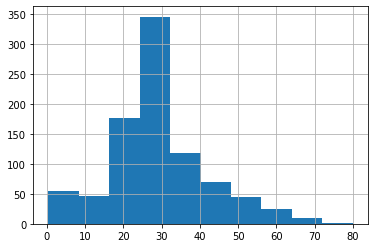

In [49]:
train['Age'].hist()

In [51]:
train['age_band'] = pd.cut(train['Age'], 5)
train.groupby('age_band').Survived.mean()

age_band
(0.34, 16.336]      0.550000
(16.336, 32.252]    0.344168
(32.252, 48.168]    0.404255
(48.168, 64.084]    0.434783
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64

In [52]:
for dataset in data:
    dataset.loc[ dataset['Age'] <= 16, 'age_number'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'age_number'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'age_number'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'age_number'] = 3
    dataset.loc[ dataset['Age'] > 64, 'age_number'] = 4 
# dataset['Age_band'].astype(int)

In [53]:
# train.loc[train['Age'] <= 16, 'Age_band_num'] = 0
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_number
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,3.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,1.0


In [58]:
age_dummies_train = pd.get_dummies(train['age_number'], prefix = 'age_', drop_first=True)
age_dummies_test = pd.get_dummies(test['age_number'], prefix = 'age_', drop_first=True)

### Cabin

In [55]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
              ..
A7             1
B3             1
B38            1
B78            1
D11            1
Name: Cabin, Length: 147, dtype: int64

We will not include Cabin in the model

### Fare

In [56]:
test['Fare'].fillna(train['Fare'].median(), inplace=True)

In [57]:
train['fare_band'] = pd.qcut(train['Fare'], 4)
train.groupby('fare_band', as_index = False).Survived.mean()

,fare_band,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [59]:
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'fare_numbered'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'fare_numbered'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'fare_numbered'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'fare_numbered'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [60]:
fare_dummies_train = pd.get_dummies(train['fare_numbered'], prefix='fare_', drop_first=True)
fare_dummies_test = pd.get_dummies(test['fare_numbered'], prefix='fare_', drop_first=True)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_band,age_number,fare_band,fare_numbered
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,0,"(16.336, 32.252]",1.0,"(-0.001, 7.91]",0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,1,"(32.252, 48.168]",2.0,"(31.0, 512.329]",3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,0,"(16.336, 32.252]",1.0,"(7.91, 14.454]",1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,0,"(32.252, 48.168]",2.0,"(31.0, 512.329]",3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,0,"(32.252, 48.168]",2.0,"(7.91, 14.454]",1.0


### Sex

In [62]:
gender_mapping = {'male':0, 'female':1}
data = [train, test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)

In [63]:
train.groupby('Sex').Survived.mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

### Sibsp

In [64]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [65]:
for dataset in data:
    dataset.loc[dataset['SibSp']==0, 'single'] = 1
    dataset.loc[dataset['SibSp']>0, 'single'] = 0
    dataset['single'].astype(int)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_band,age_number,fare_band,fare_numbered,single
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0,"(16.336, 32.252]",1.0,"(-0.001, 7.91]",0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1,"(32.252, 48.168]",2.0,"(31.0, 512.329]",3.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0,"(16.336, 32.252]",1.0,"(7.91, 14.454]",1.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0,"(32.252, 48.168]",2.0,"(31.0, 512.329]",3.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0,"(32.252, 48.168]",2.0,"(7.91, 14.454]",1.0,1.0


## Visualizations

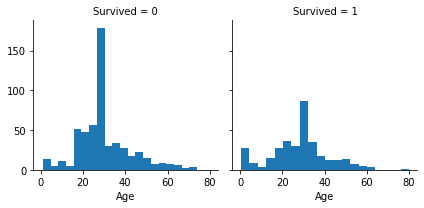

In [69]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

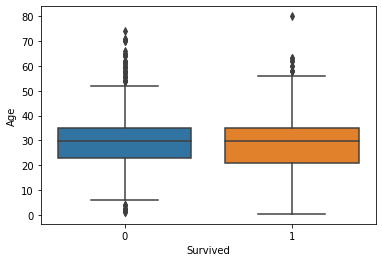

In [74]:
#boxplot
sns.boxplot(y='Age', x='Survived', data=train)

Text(0.5, 1.0, 'Box plot of Fare by survived')

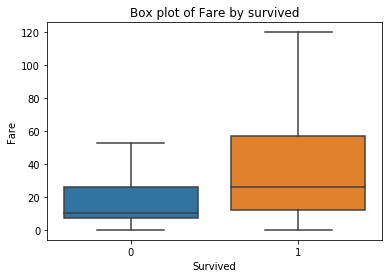

In [95]:
sns.boxplot(y='Fare', x='Survived', data=train, showfliers=False)
plt.title('Box plot of Fare by survived')


/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


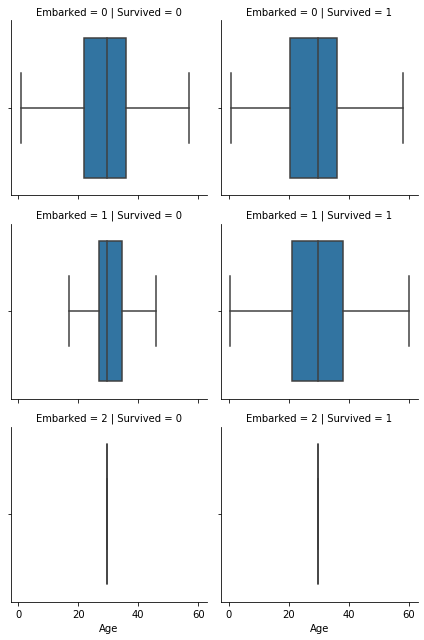

In [99]:
y = sns.FacetGrid(train, col='Survived', row='Embarked')
y.map(sns.boxplot, 'Age', showfliers=False)